In [22]:
import pandas as pd
import geopandas as gpd
import fiona
import time
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def print_statistical_info_Building(gdf_commercial, titles):
    print ('The following info is the ' + titles +':')
    print ('The total building number is ' + str(len(gdf_commercial)))  # area
    print ('The total area is ' + str(gdf_commercial['BUILDING_SQFT'].sum()))  # area
    print ('The average per area is ' + str(gdf_commercial['BUILDING_SQFT'].sum()/(len(gdf_commercial))))  # area
    print ('The Maximum area is ' + str(gdf_commercial['BUILDING_SQFT'].max()))
    print ('The Minimum area is ' + str(gdf_commercial['BUILDING_SQFT'].min()))
    plt.figure()
    plt.plot(gdf_commercial['BUILDING_SQFT'],'r.')
    plt.title(titles)
    print ('=============================================')    
    
    
def plot_distribution(gdf_commercial,uplimit):
    tem2 = gdf_commercial[gdf_commercial['BUILDING_SQFT']<uplimit]
    plt.plot(tem2['BUILDING_SQFT'],'r.')
    plt.xlabel('Building id')
    plt.ylabel('BUILDING_SQFT')
    plt.title('Building square distributeion under the SQFT of ' + str(uplimit))
    plt.show()
    print tem2['BUILDING_SQFT'].max()
    print tem2['BUILDING_SQFT'].mean()
    print tem2['BUILDING_SQFT'].min()

# Result analysis

In [34]:
gdf_commercial = pd.read_csv('CA_files/gdf_commercial_all_TX_multi_countries_layer.csv')

All = len(gdf_commercial)
print str(len(gdf_commercial)) + ' All data'
TooSamll = len(gdf_commercial[gdf_commercial['BUILDING_SQFT']<50])
print str(len(gdf_commercial[gdf_commercial['BUILDING_SQFT']<50]))  + ' too small, <50'

NotTooSamll = len(gdf_commercial[gdf_commercial['BUILDING_SQFT']>=50])
gdf_commercial = gdf_commercial[gdf_commercial['BUILDING_SQFT']>=50]
print str(len(gdf_commercial)) + ' All - too small, >50'

print str(All - NotTooSamll - TooSamll) + ' Data missing'
Large = len(gdf_commercial[gdf_commercial['BUILDING_SQFT']>=60000])
print str(len(gdf_commercial[gdf_commercial['BUILDING_SQFT']>=60000]))  + ' Large type, >60000'
Small = len(gdf_commercial[gdf_commercial['BUILDING_SQFT']<20000])
print str(NotTooSamll - Large - Small)  + ' Medium type, 20000 - 60000'
print str(len(gdf_commercial[gdf_commercial['BUILDING_SQFT']<20000]))  + ' Small type, <20000'
len(gdf_commercial)

467179 All data
691 too small, <50
345233 All - too small, >50
121255 Data missing
13119 Large type, >60000
27067 Medium type, 20000 - 60000
305047 Small type, <20000


345233

In [35]:
type(gdf_commercial['BUILDING_SQFT'])

pandas.core.series.Series

In [36]:
Point1 = 20000
Point2 = 60000
    
print Point1
print Point2
gdf_commercial_Large = gdf_commercial[gdf_commercial['BUILDING_SQFT']>=Point2]
gdf_commercial_Med_tem = gdf_commercial[gdf_commercial['BUILDING_SQFT']<=Point2]
gdf_commercial_Med = gdf_commercial_Med_tem[gdf_commercial_Med_tem['BUILDING_SQFT']>=Point1]
gdf_commercial_Small = gdf_commercial[gdf_commercial['BUILDING_SQFT']<Point1]

# gdf_commercial[gdf_commercial['BUILDING_SQFT']<200000]

20000
60000


The following info is the Building SQFT distribution of CA:
The total building number is 345233
The total area is 4379905808.0
The average per area is 12686.810959554852
The Maximum area is 27050760.0
The Minimum area is 50.0
The following info is the Large buildings:
The total building number is 13119
The total area is 2044375188.0
The average per area is 155833.15710038875
The Maximum area is 27050760.0
The Minimum area is 60000.0
The following info is the Med buildings:
The total building number is 27129
The total area is 917390692.0
The average per area is 33815.86833278042
The Maximum area is 60000.0
The Minimum area is 20000.0
The following info is the Small buildings:
The total building number is 305047
The total area is 1421859928.0
The average per area is 4661.117558933542
The Maximum area is 19998.0
The Minimum area is 50.0


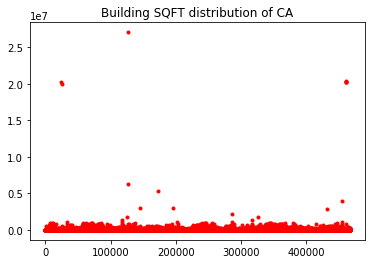

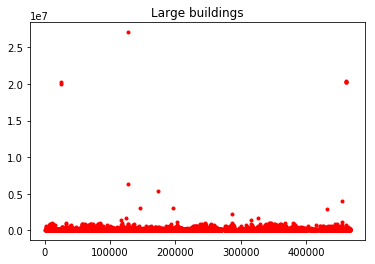

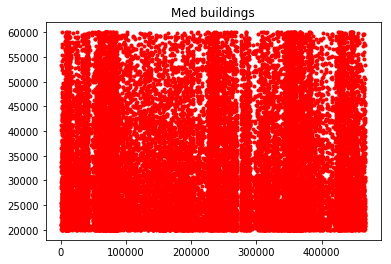

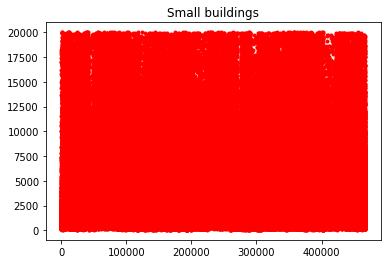

In [37]:
print_statistical_info_Building(gdf_commercial, 'Building SQFT distribution of CA')
print_statistical_info_Building(gdf_commercial_Large, 'Large buildings')
print_statistical_info_Building(gdf_commercial_Med, 'Med buildings')
print_statistical_info_Building(gdf_commercial_Small, 'Small buildings')

## Review the area distribution

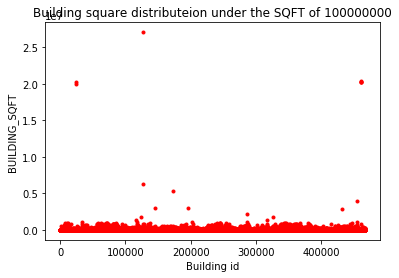

27050760.0
12686.810959554852
50.0


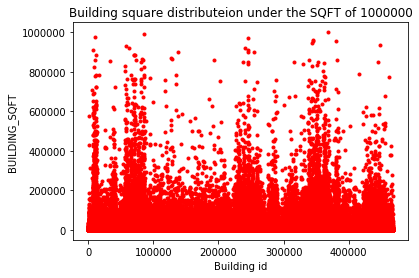

999728.0
12147.315245792417
50.0


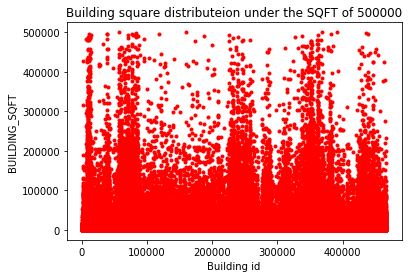

499982.0
11542.759543036085
50.0


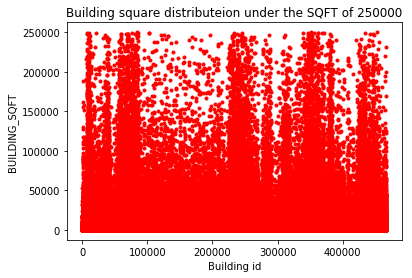

249929.0
10512.743585940114
50.0


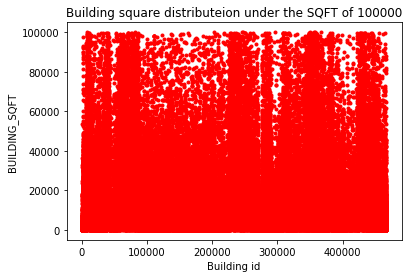

99996.0
8334.815900026588
50.0


In [17]:
plot_distribution(gdf_commercial,100000000)

plot_distribution(gdf_commercial,1000000)

plot_distribution(gdf_commercial,500000)

plot_distribution(gdf_commercial,250000)

plot_distribution(gdf_commercial,100000)